In [1]:
import pandas as pd
import pickle
import glob
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300

In [25]:
datasets = [
    'CBF',
    'ItalyPowerDemand',
    'ECG200',
    'ECGFiveDays',
    'Plane',
    'ShapeletSim',
    'SonyAIBORobotSurface1',
    'SonyAIBORobotSurface2',
    'Trace',
    'TwoLeadECG'
]
uncertainty_levels = [
    '0_1',
    '0_8',
    '2_0'
]
similarity_measures = [
    'FOTS',
    'UED',
    'ED'
]

classes_dict = {
    'CBF': 3,
    'ItalyPowerDemand': 2,
    'ECG200': 2,
    'ECGFiveDays': 2,
    'Plane': 7,
    'ShapeletSim': 2,
    'SonyAIBORobotSurface1': 2,
    'SonyAIBORobotSurface2': 2,
    'Trace': 4,
    'TwoLeadECG': 2
}

## Fetch metrics from results file

In [26]:
results_version = '12_07'

In [27]:
results_paths = glob.glob(os.path.join(results_version, '*.dat'))
print('results_paths:', len(results_paths))

results_paths: 90


In [28]:
index = pd.MultiIndex.from_product([datasets, uncertainty_levels, similarity_measures],
                                   names=['dataset', 'uncertainty_level', 'similarity_measure'])
df_results = pd.DataFrame(index=index, columns=['RI', 'time', 'lenSubsequence', 'num_clusters', 'num_classes'])

filename_pattern = re.compile('results_(\w*)_(\d_\d)_(\w*).dat')

for results_path in results_paths:
    filename = filename_pattern.match(os.path.basename(results_path))
    dataset = filename.group(1)
    uncertainty_level = filename.group(2)
    similarity_measure = filename.group(3)
    print('dataset:', dataset)
    print('uncertainty_level:', uncertainty_level)
    print('similarity_measure:', similarity_measure)
    
    with open(results_path, 'rb') as f:
        results = pickle.load(f)
        
        lenSubsequences = list(results.keys())
        print('lenSubsequences:', lenSubsequences)

        bestLenSubsequence = lenSubsequences[0]
        bestRI = results[bestLenSubsequence]['RI']
        for curLenSubsequence in lenSubsequences:
            curRI = results[curLenSubsequence]['RI']
            print('lenSubsequence:', curLenSubsequence, '\tRI:', curRI)
            if curRI > bestRI:
                bestRI = curRI
                bestLenSubsequence = curLenSubsequence
        print('bestLenSubsequence:', bestLenSubsequence)
        print('bestRI:', bestRI)
        print()

        for lenSubsequence in lenSubsequences:
            df_results.loc[(dataset, uncertainty_level, similarity_measure), 'RI'] = float(results[bestLenSubsequence]['RI'])
            df_results.loc[(dataset, uncertainty_level, similarity_measure), 'time'] = float(results[bestLenSubsequence]['time'])
            df_results.loc[(dataset, uncertainty_level, similarity_measure), 'lenSubsequence'] = int(bestLenSubsequence)
            df_results.loc[(dataset, uncertainty_level, similarity_measure), 'num_clusters'] = int(results[bestLenSubsequence]['num_clusters'])
            df_results.loc[(dataset, uncertainty_level, similarity_measure), 'num_classes'] = classes_dict[dataset]

dataset: ShapeletSim
uncertainty_level: 0_1
similarity_measure: UED
lenSubsequences: [11, 14, 15, 16]
lenSubsequence: 11 	RI: 1.0
lenSubsequence: 14 	RI: 1.0
lenSubsequence: 15 	RI: 1.0
lenSubsequence: 16 	RI: 1.0
bestLenSubsequence: 11
bestRI: 1.0

dataset: ShapeletSim
uncertainty_level: 0_1
similarity_measure: ED
lenSubsequences: [10, 12, 13, 14]
lenSubsequence: 10 	RI: 0.99
lenSubsequence: 12 	RI: 1.0
lenSubsequence: 13 	RI: 1.0
lenSubsequence: 14 	RI: 1.0
bestLenSubsequence: 12
bestRI: 1.0

dataset: ECGFiveDays
uncertainty_level: 0_8
similarity_measure: UED
lenSubsequences: [30, 32, 34, 36, 38]
lenSubsequence: 30 	RI: 0.5090702715444572
lenSubsequence: 32 	RI: 0.501706440917686
lenSubsequence: 34 	RI: 0.5024136146313216
lenSubsequence: 36 	RI: 0.5012939229180652
lenSubsequence: 38 	RI: 0.5018883587932952
bestLenSubsequence: 30
bestRI: 0.5090702715444572

dataset: ECGFiveDays
uncertainty_level: 0_8
similarity_measure: FOTS
lenSubsequences: [10, 14, 18]
lenSubsequence: 10 	RI: 0.5006

/home/mimbouop/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2899: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


lenSubsequences: [7, 8, 9, 12, 13, 14]
lenSubsequence: 7 	RI: 0.685678391959799
lenSubsequence: 8 	RI: 0.4985929648241206
lenSubsequence: 9 	RI: 0.39683417085427136
lenSubsequence: 12 	RI: 0.39653266331658293
lenSubsequence: 13 	RI: 0.625678391959799
lenSubsequence: 14 	RI: 0.6103517587939699
bestLenSubsequence: 7
bestRI: 0.685678391959799

dataset: ShapeletSim
uncertainty_level: 2_0
similarity_measure: ED
lenSubsequences: [10, 12, 13, 14]
lenSubsequence: 10 	RI: 0.49844221105527636
lenSubsequence: 12 	RI: 0.5030653266331658
lenSubsequence: 13 	RI: 0.5009547738693467
lenSubsequence: 14 	RI: 0.49814070351758793
bestLenSubsequence: 12
bestRI: 0.5030653266331658

dataset: CBF
uncertainty_level: 0_8
similarity_measure: ED
lenSubsequences: [42, 43, 44, 45, 46]
lenSubsequence: 42 	RI: 0.4729145687928979
lenSubsequence: 43 	RI: 0.48982487817864045
lenSubsequence: 44 	RI: 0.4814796810074424
lenSubsequence: 45 	RI: 0.4817898769633205
lenSubsequence: 46 	RI: 0.4848733173605565
bestLenSubsequence

In [29]:
# Output to the console
df_results

RI          time  \
dataset    uncertainty_level similarity_measure                           
CBF        0_1               FOTS                0.645624  31580.362402   
                             UED                  0.48804   1018.535535   
                             ED                   0.49038    555.690794   
           0_8               FOTS                0.634267  29846.330181   
                             UED                 0.478669    998.459506   
...                                                   ...           ...   
TwoLeadECG 0_8               UED                 0.510599   1290.166833   
                             ED                  0.500573    512.225466   
           2_0               FOTS                0.500349  25272.739114   
                             UED                 0.501127   1878.857225   
                             ED                   0.49978    607.078098   

                                                lenSubsequence num_clusters  \
dataset    uncertainty_level similarity_measure                               
CBF        0_1               FOTS                            7           16   
                             UED                            37            3   
                             ED                             46            4   
           0_8               FOTS                            6           15   
                             UED                            38            4   
...                                                        ...          ...   
TwoLeadECG 0_8               UED                            17            6   
                             ED                             20            6   
           2_0               FOTS                           15           14   
                             UED                            14            3   
                             ED                             17            8   

                                                num_classes  
dataset    uncertainty_level similarity_measure              
CBF        0_1               FOTS                         3  
                             UED                          3  
                             ED                           3  
           0_8               FOTS                         3  
                             UED                          3  
...                                                     ...  
TwoLeadECG 0_8               UED                          2  
                             ED                           2  
           2_0               FOTS                         2  
                             UED                          2  
                             ED                           2  

[90 rows x 5 columns]

In [30]:
df_results

RI          time  \
dataset    uncertainty_level similarity_measure                           
CBF        0_1               FOTS                0.645624  31580.362402   
                             UED                  0.48804   1018.535535   
                             ED                   0.49038    555.690794   
           0_8               FOTS                0.634267  29846.330181   
                             UED                 0.478669    998.459506   
...                                                   ...           ...   
TwoLeadECG 0_8               UED                 0.510599   1290.166833   
                             ED                  0.500573    512.225466   
           2_0               FOTS                0.500349  25272.739114   
                             UED                 0.501127   1878.857225   
                             ED                   0.49978    607.078098   

                                                lenSubsequence num_clusters  \
dataset    uncertainty_level similarity_measure                               
CBF        0_1               FOTS                            7           16   
                             UED                            37            3   
                             ED                             46            4   
           0_8               FOTS                            6           15   
                             UED                            38            4   
...                                                        ...          ...   
TwoLeadECG 0_8               UED                            17            6   
                             ED                             20            6   
           2_0               FOTS                           15           14   
                             UED                            14            3   
                             ED                             17            8   

                                                num_classes  
dataset    uncertainty_level similarity_measure              
CBF        0_1               FOTS                         3  
                             UED                          3  
                             ED                           3  
           0_8               FOTS                         3  
                             UED                          3  
...                                                     ...  
TwoLeadECG 0_8               UED                          2  
                             ED                           2  
           2_0               FOTS                         2  
                             UED                          2  
                             ED                           2  

[90 rows x 5 columns]

## Export the big table to Excel

In [31]:
df_results.to_excel(os.path.join(results_version, 'results_table.xlsx'))

In [32]:
df_results.to_latex(os.path.join(results_version, 'results_table.tex'), float_format='{:0.3f}'.format, multirow=True)

## Generate barplots

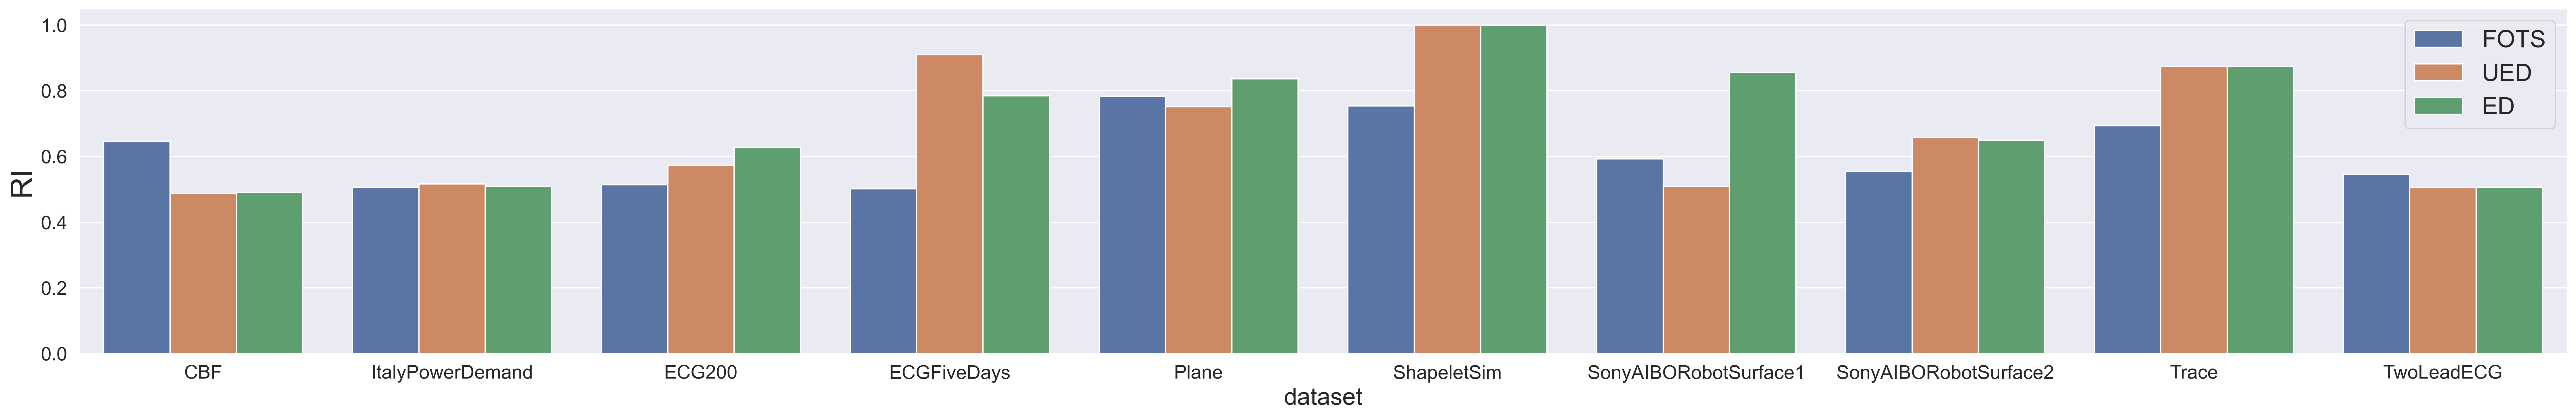

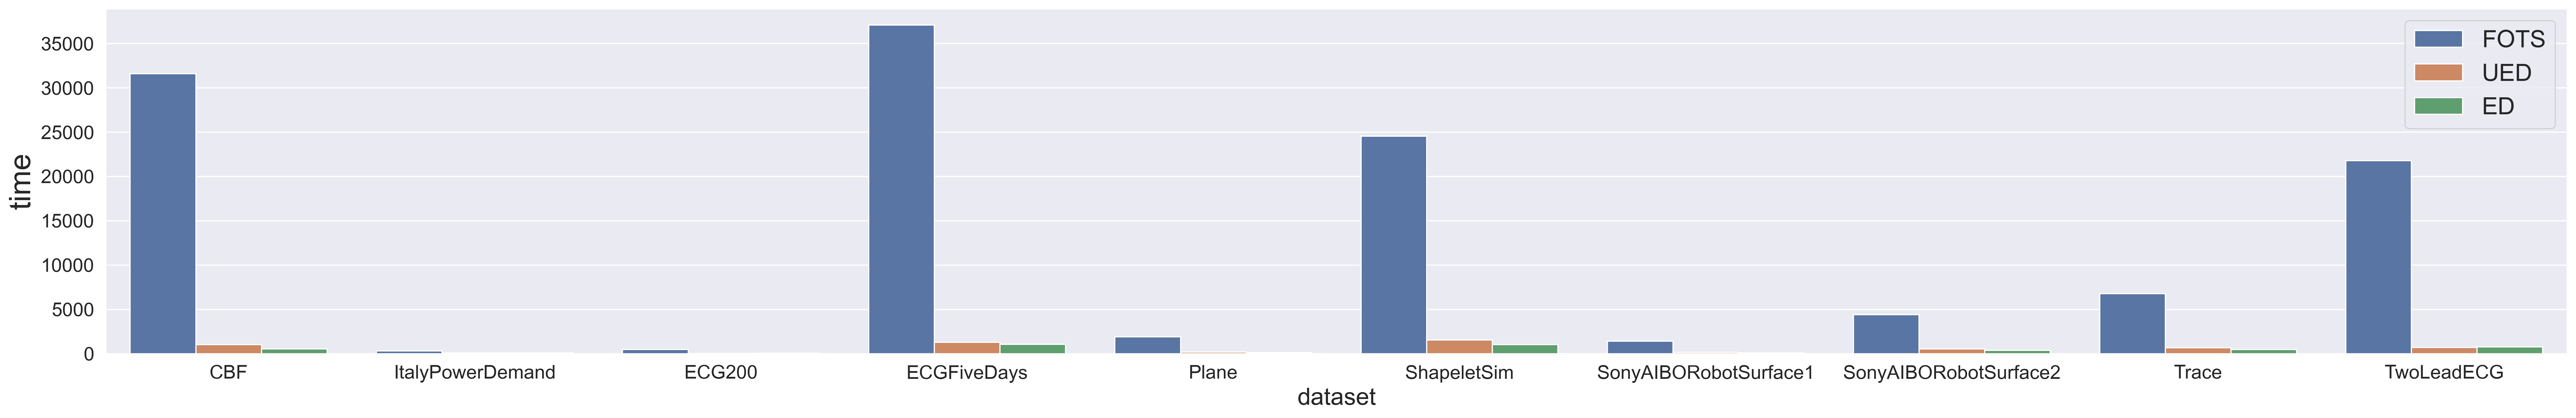

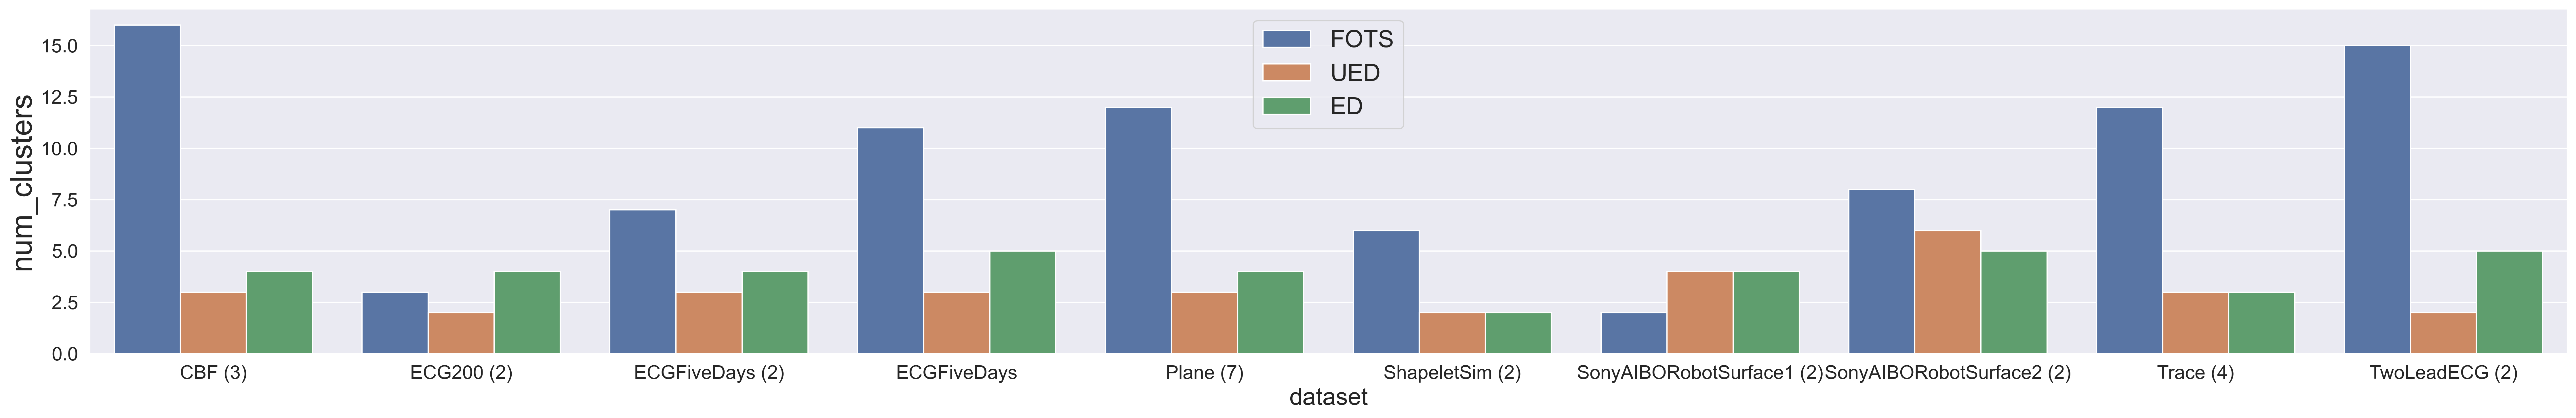

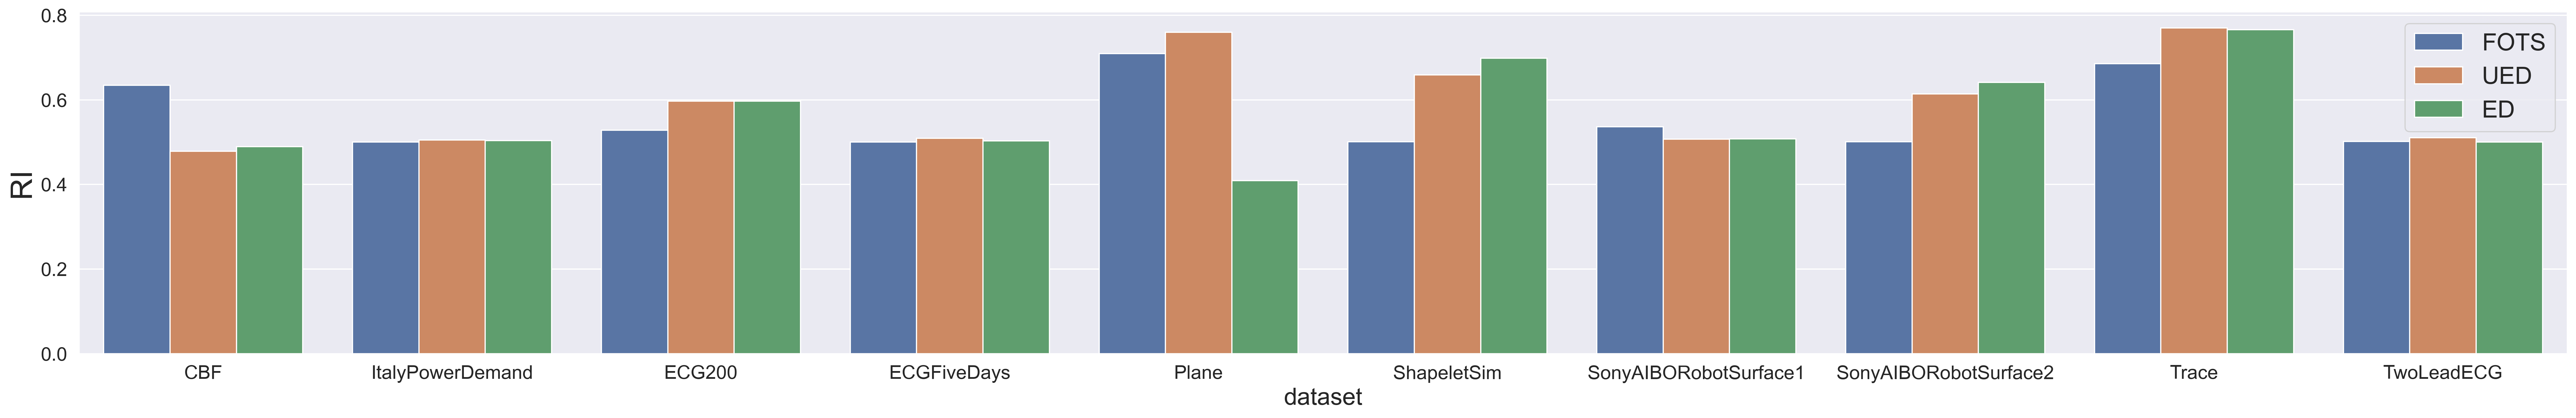

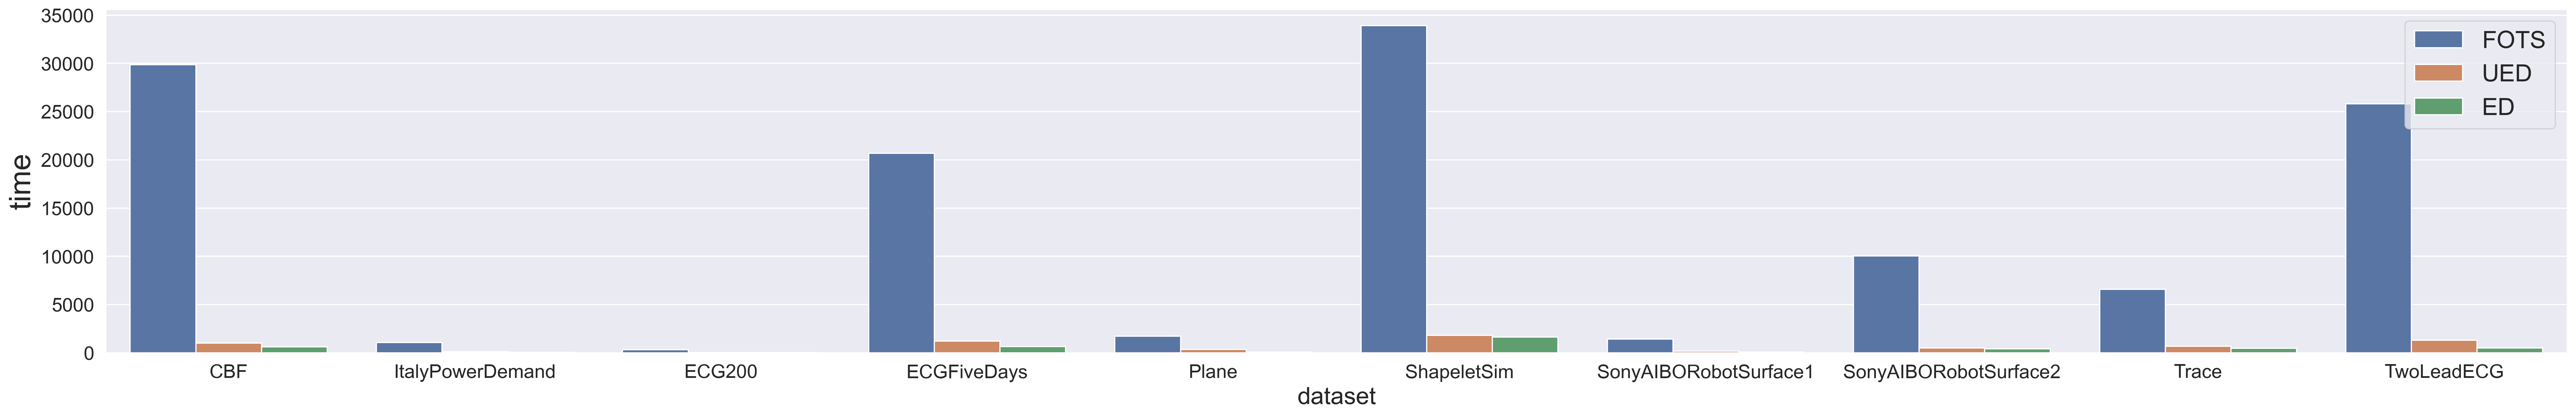

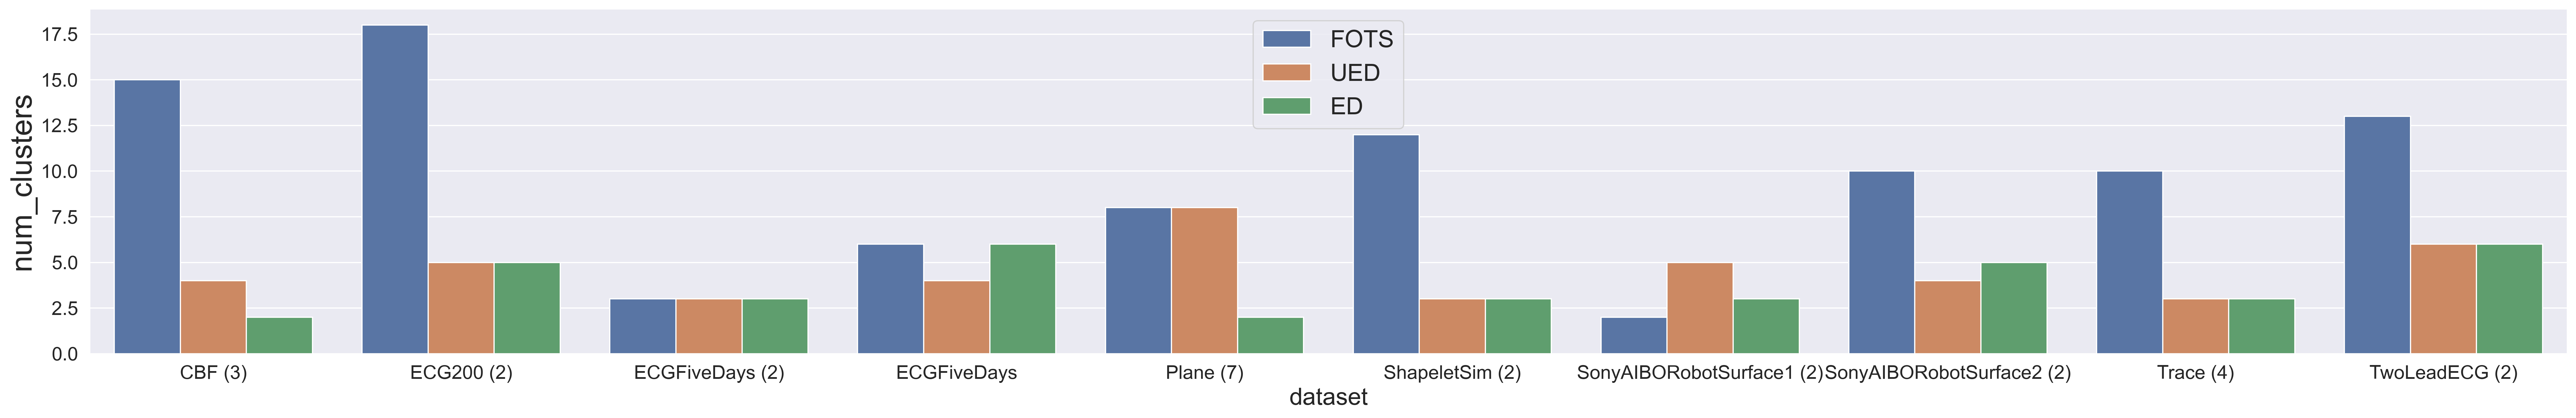

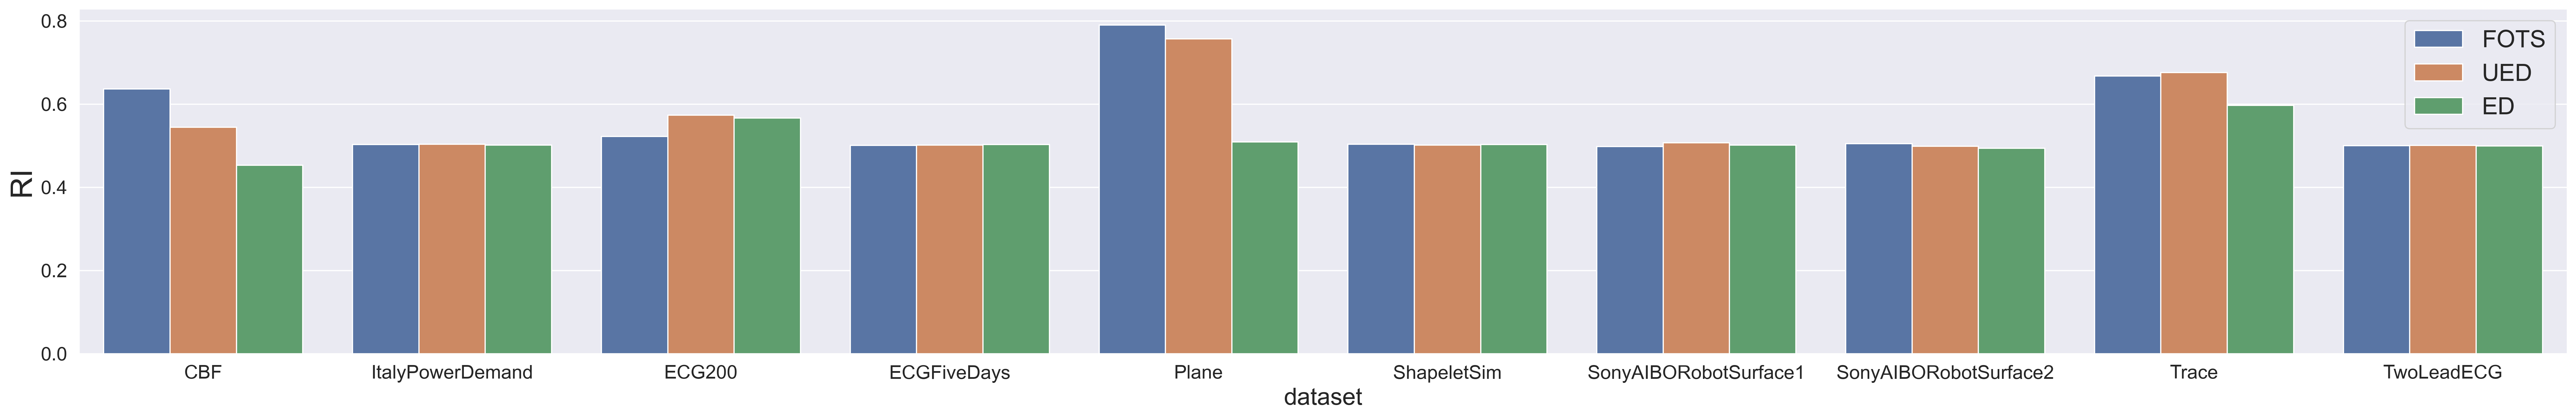

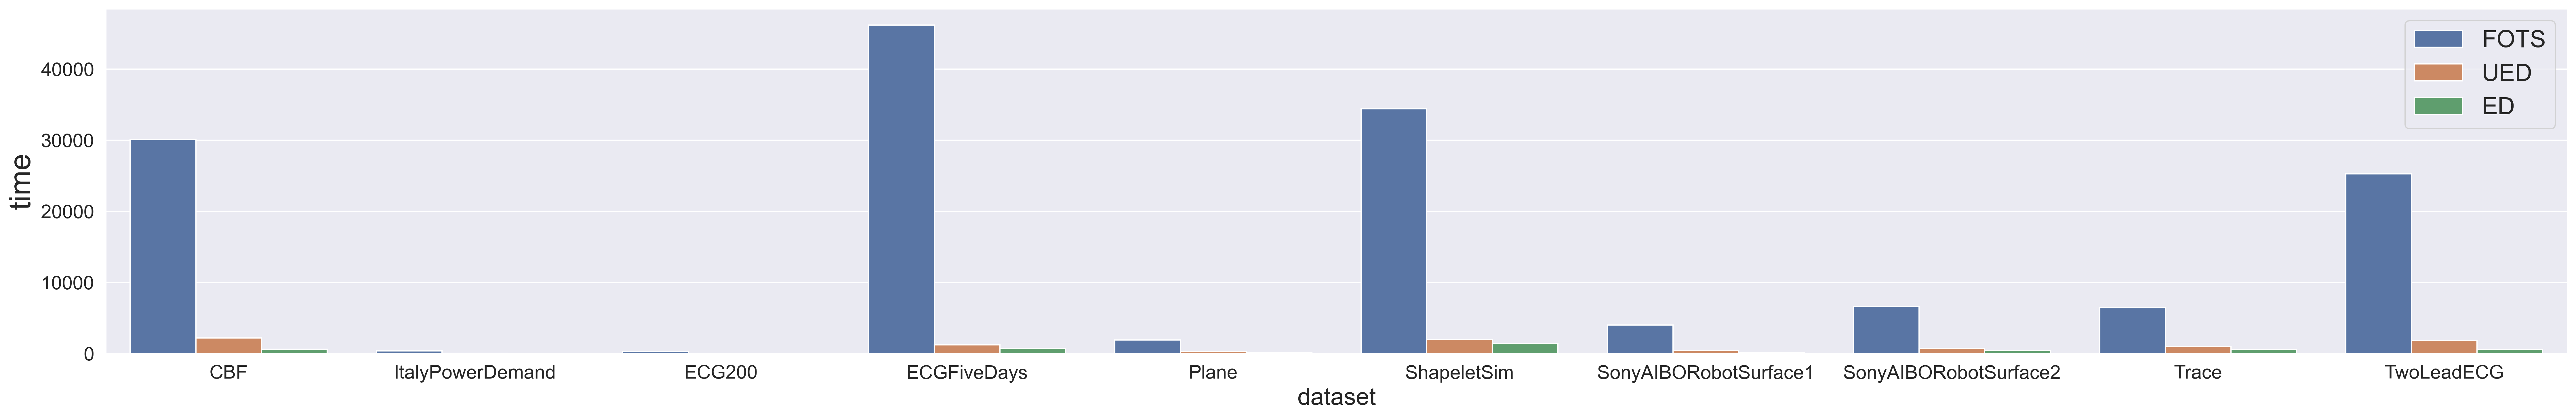

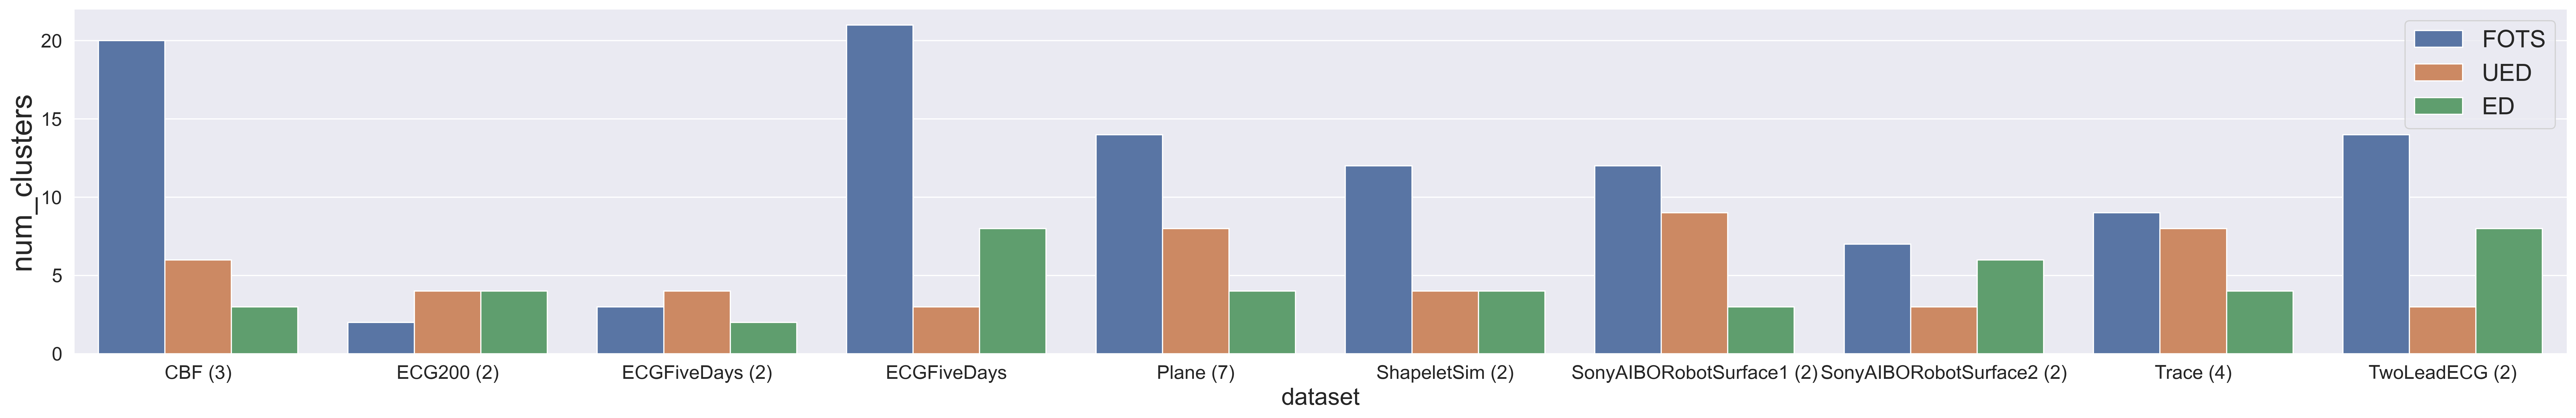

In [49]:
for uncertainty_level in uncertainty_levels:
    for metrics in ['RI', 'time', 'num_clusters']:
        fig_name = os.path.join(results_version, 'barplot_' + uncertainty_level + '_' + metrics + '.pdf')
    
        df_temp = df_results.reset_index(['dataset', 'uncertainty_level', 'similarity_measure'])
        df_temp = df_temp[df_temp.uncertainty_level == uncertainty_level]

        if metrics == 'num_clusters':
            df_temp = df_temp.replace({
                'CBF':'CBF (3)',
                'ItalyPowerDemand': 'ItalyPowerDemand (2)',
                'ItalyPowerDemand': 'ECG200 (2)',
                'ECG200': 'ECGFiveDays (2)',
                'Plane': 'Plane (7)',
                'ShapeletSim': 'ShapeletSim (2)',
                'SonyAIBORobotSurface1': 'SonyAIBORobotSurface1 (2)',
                'SonyAIBORobotSurface2': 'SonyAIBORobotSurface2 (2)',
                'Trace': 'Trace (4)',
                'TwoLeadECG': 'TwoLeadECG (2)'
            })
        sns.set()
        plt.figure(figsize=(30, 5))
        b = sns.barplot(data=df_temp, x='dataset', y=metrics, hue='similarity_measure')
        b.tick_params(labelsize=16)
        b.set_xlabel(b.get_xlabel(), fontsize=20)
        b.set_ylabel(b.get_ylabel(), fontsize=25)
        plt.legend(prop={'size': 20})
        plt.tight_layout()
        plt.savefig(fig_name)